# BC3409 AI in Accounting & Finance Group 3 Code 
In this notebook, we hightlight the  approaches we took to train and test the various CNN models. We start with a self-train model using Keras Tensorflow, followed by an improvement to this model. We will also evaluate this effectiveness of the model against other popular CNN models such as VGG, ResNet and AlexNet. Ultimately, we will compare the results obtained from each model to determine the most optimal model to predict melanoma 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
import cv2
import numpy as np
import os
import joblib
from keras.regularizers import l1, l2
from keras.applications.resnet import ResNet50
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/BC3409/melanoma_cancer_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_654.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_655.jpg  
  inflating: melanoma_cancer_dataset/train/benign/mel

In [ ]:
data_path = '/content/melanoma_cancer_dataset'
train_path = '/content/melanoma_cancer_dataset/train'
test_path = '/content/melanoma_cancer_dataset/test'
os.listdir(train_path)

['malignant', 'benign']

### ResNet50

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
Y_train = []
X_train = []

In [ ]:
label = 0
for i in os.listdir(train_path):
  path = train_path + "/" + i + "/" 
  for j in os.listdir(path):
    #load image from path
    img = cv2.imread(path+j) 
    #resize the image into (150, 150)
    img = cv2.resize(img, (150, 150)) 
    #Converts PIL Image instance to a Numpy array of shape (150, 150, 3)
    img = image.img_to_array(img) 
    #Convert the image from NumPy format to Batch format (1,150, 150, 3) (to make sure the data is in the correct structure)
    img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
    #Embedding the data 
    img = model.predict(img)
    #flatten the array then normalize
    X_train.append(img.flatten()/255) 
    Y_train.append(label)
  label = label + 1

In [ ]:
Y_test = []
X_test = []

In [ ]:
label = 0
for i in os.listdir(test_path):
  path = test_path + "/" + i + "/" 
  for j in os.listdir(path):
    img = cv2.imread(path+j)
    img = cv2.resize(img, (150, 150))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
    img = model.predict(img)
    X_test.append(img.flatten()/255) #normalize
    Y_test.append(label)
  label = label + 1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
model = linear_model.LogisticRegression().fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
# print((cm[0,0]+cm[1,1])/(sum(sum(cm)))) #accuracy
print(accuracy_score(Y_test, pred))

0.914


In [ ]:
cm

array([[440,  60],
       [ 26, 474]])

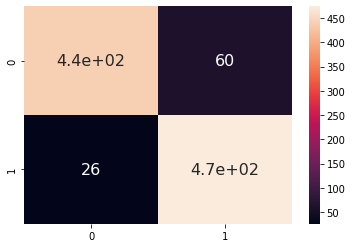

In [ ]:
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


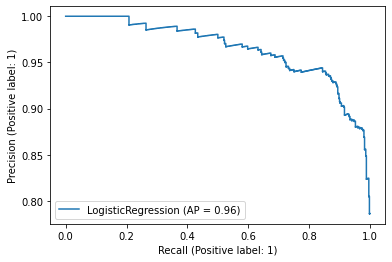

In [ ]:
plot_precision_recall_curve(model, X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


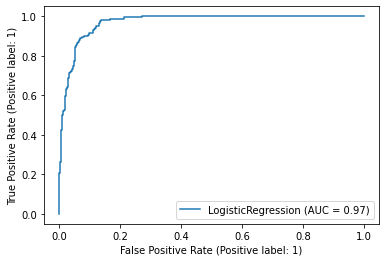

In [ ]:
plot_roc_curve(model, X_test, Y_test)

In [ ]:
joblib.dump(model,'resnet_lgmodel')

['resnet_lgmodel']

In [ ]:

tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)


acc = (tp+tn)/(tp+tn+fn+fp)

print("Accuracy is: ", acc)

fnr = fn/(tp+fn)
print("False Negative Rate is: ", fnr)

precision = tp/(tp+fp)
print("Precision is : ", precision)

recall = tp/(tp+fn)
print("Recall is : ", recall)

Accuracy is:  0.914
False Negative Rate is:  0.052
Precision is :  0.8876404494382022
Recall is :  0.948


In [ ]:
model = Sequential()

p_model= ResNet50(include_top=False,
                   input_shape=(300,300,3),
                   weights='imagenet')
# for layer in p_model.layers:
#         layer.trainable=False

model.add(p_model)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

In [ ]:
h = model.fit(train_data, steps_per_epoch=128, epochs=50, batch_size=5)

In [ ]:
print("training_accuracy", h.history['accuracy'][-1])
# print("validation_accuracy", h.history['val_accuracy'][-1])

In [ ]:
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)
#for a multiclass classification use: pred = np.argmax(pred,axis=1)
#for a binary classification use: pred = pred > 0.5
#pred = pred.astype('int32')
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
accuracy

In [ ]:
losses = pd.DataFrame(h.history)
losses.head()
losses['loss'].plot() 
losses['accuracy'].plot() 
losses.plot()

In [ ]:
model.save('/content/drive/MyDrive/BC3409/Models/resnet-50.pb')

In [ ]:

tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)


acc = (tp+tn)/(tp+tn+fn+fp)

print("Accuracy is: ", acc)

fnr = fn/(tp+fn)
print("False Negative Rate is: ", fnr)

precision = tp/(tp+fp)
print("Precision is : ", precision)

recall = tp/(tp+fn)
print("Recall is : ", recall)